In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [39]:
from google.colab import files
uploaded= files.upload()


Saving OurData.csv to OurData (1).csv


In [57]:
import pandas as pd    # a wonderful dataframe to work with
import numpy as np     # adding a number of mathematical and science functions
import seaborn as sns  # a very easy to use statistical data visualization package
import matplotlib.pyplot as plt # a required plotting tool
import warnings
# sklearn is a big source of pre-written and mostly optimized ML algorithms.
# Here we use their Decision trees, Support Vector Machines, and the classic Perceptron. 
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')



In [58]:
import io
data=pd.read_csv(io.BytesIO(uploaded['OurData.csv']))

In [59]:
# Translate GradeID from categorical to numerical
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

data = data.replace({"GradeID" : gradeID_dict})

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
data = data.replace({"Class" : class_dict})

# Scale numerical fields
data["GradeID"] = preprocessing.scale(data["GradeID"])
data["raisedhands"] = preprocessing.scale(data["raisedhands"])
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])
data["Discussion"] = preprocessing.scale(data["Discussion"])

# Use dummy variables for categorical fields
data = pd.get_dummies(data, columns=["gender",
                                     "NationalITy",
                                     "PlaceofBirth",
                                     "SectionID",
                                     "StageID",
                                     "Topic",
                                     "Semester",
                                     "Relation",
                                     "ParentAnsweringSurvey",
                                     "ParentschoolSatisfaction",
                                     "StudentAbsenceDays"])

# Show preprocessed data
data.head()


,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [60]:
corr = data.corr()
corr.iloc[[5]]

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


In [61]:
# Step 4: Split the data into training and testing sets
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)


In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.16520434338522147
R-squared Score: 0.6684400634498692


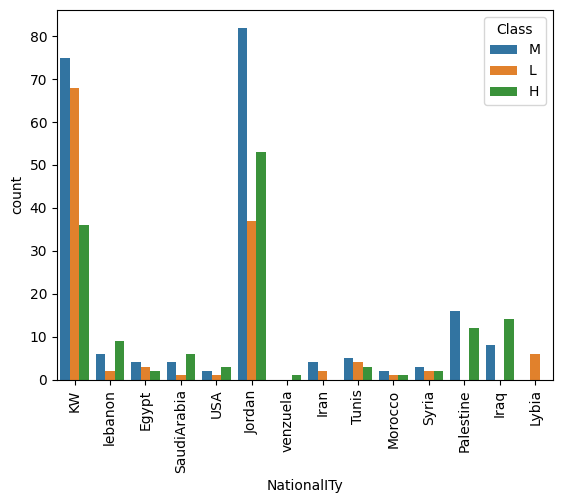

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('OurData.csv')

# Bar plot of class count by nationality
sns.countplot(x='NationalITy', hue='Class', data=data)
plt.xticks(rotation=90)
plt.show()


Bar Plot: A bar plot can be used to visualize the count of students in each class (L, M, H) based on a specific categorical variable. This can help us understand if certain categories in a variable have a higher proportion of students in a particular class, indicating a correlation between the variable and academic performance.

we are creating a bar plot of the count of students in each class based on their nationality. This can help us understand if nationality has any correlation with academic performance. The sns.countplot() function is used to create the plot, and the hue parameter is set to 'Class' to show the count of students in each class. We rotate the x-axis labels using plt.xticks(rotation=90) to make them readable.

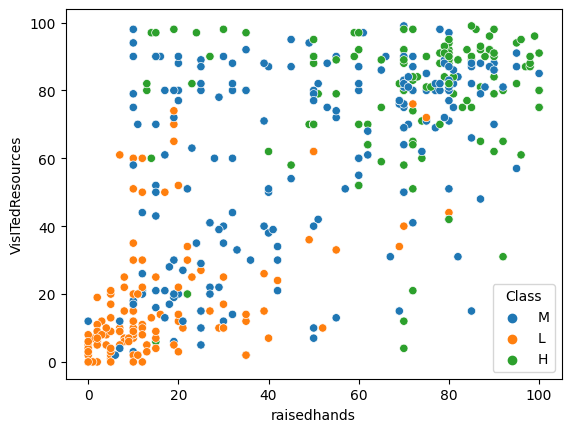

In [71]:
# Scatter plot of 'raisedhands' and 'VisITedResources' with Class as hue
sns.scatterplot(x='raisedhands', y='VisITedResources', hue='Class', data=data)
plt.show()



Scatter Plot: A scatter plot can be used to visualize the relationship between two continuous variables, such as 'raisedhands' and 'VisITedResources'. This can help us understand if there is a correlation between the two variables and academic performance. 


we are creating a scatter plot of 'raisedhands' and 'VisITedResources' with 'Class' as hue. This can help us understand if there is a correlation between these two variables and academic performance. The sns.scatterplot() function is used to create the plot, and the hue parameter is set to 'Class' to show the class of each student.

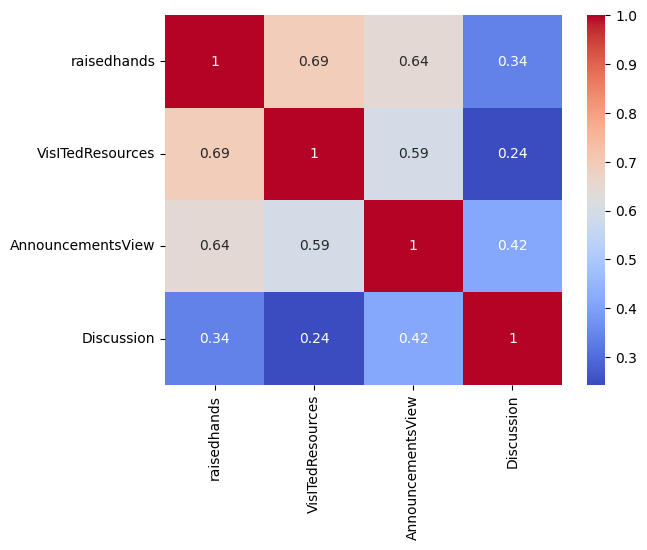

In [72]:
# Heat map of correlation between continuous variables
corr = data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Heat Map: A heat map can be used to visualize the correlation between all the continuous variables in the dataset. This can help us understand which variables are highly correlated with academic performance and which are not. 


we are creating a heat map of the correlation between the continuous variables 'raisedhands', 'VisITedResources', 'AnnouncementsView', and 'Discussion'. This can help us understand which variables are highly correlated with academic performance. The corr() function is used to calculate the correlation matrix, and the sns.heatmap() function is used to create the plot with annotations to show the correlation coefficients. The cmap parameter is set to 'coolwarm' to use a color map that goes from blue to red to show negative to positive correlations.

**By analyzing these plots, we can get an idea of which features are important for predicting academic performance. For example, from the bar plot, we can see that certain nationalities have a higher proportion of students in the H class, indicating a correlation between nationality and academic performance. From the scatter plot, we can see that students who raise their hands and visit course content more often tend to have higher academic performance. From the heat map, we can see that 'raisedhands' and 'VisITedResources'**

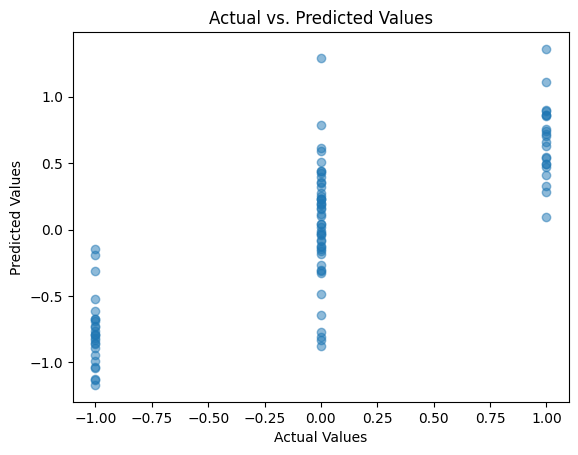

In [73]:
import matplotlib.pyplot as plt

# assuming your model is named 'model' and your test data is in 'X_test'
y_pred = model.predict(X_test)

# plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


We first predict the target variable values on the test data using our model. Then we plot a scatter plot with the actual target variable values on the x-axis and the predicted target variable values on the y-axis. This plot helps us to visualize how well our model is predicting the target variable values.   

The closer the points are to the 45-degree line (i.e., the line passing through the origin with slope 1), the better the model is at predicting the target variable values.

In [78]:
print(data.columns)


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


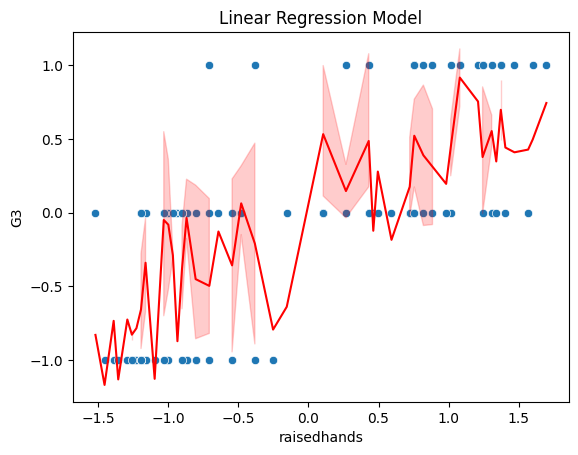

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred = model.predict(X_test)

# Create a scatter plot of the test data
sns.scatterplot(x=X_test['raisedhands'], y=y_test)

# Plot the predicted values as a line
sns.lineplot(x=X_test['raisedhands'], y=y_pred, color='red')

# Add axis labels and a title
plt.xlabel('raisedhands')
plt.ylabel('G3')
plt.title('Linear Regression Model')

# Show the plot
plt.show()


we first make predictions on the test data using the trained linear regression model. Then we create a scatter plot of the test data using Seaborn's scatterplot function, with raisedhands on the x-axis and G3 (the target variable) on the y-axis. We then plot the predicted values as a line using Seaborn's lineplot function, with the same x-axis as before and the predicted values on the y-axis. Finally, we add axis labels and a title to the plot and show it using Matplotlib's show function.

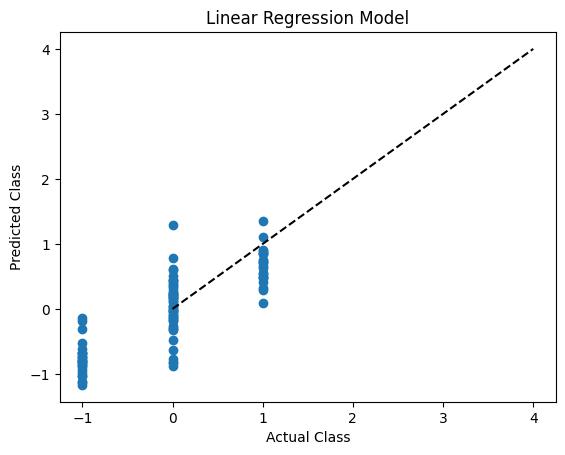

In [90]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual and predicted values
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation (y = x)
plt.plot([0, 4], [0, 4], '--k')

# Label the plot
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Linear Regression Model')

# Show the plot
plt.show()


This code generates a scatter plot that compares the actual values of the target variable 'Class' in the test dataset with the predicted values obtained from the linear regression model. The x-axis of the plot represents the actual values of 'Class', while the y-axis represents the predicted values of 'Class'.

The scatter plot is created using the Matplotlib library's scatter() function, which takes two arguments - the actual values of 'Class' (y_test) and the predicted values of 'Class' (y_pred).

The code then adds a black dashed line with --k to the plot, which represents perfect correlation (y = x). This line shows how closely the predicted values align with the actual values.

Lastly, the code adds labels to the x and y axes and a title to the plot using the xlabel(), ylabel(), and title() functions, respectively. Finally, the plot is shown using the show() function.

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("OurData.csv")

# Convert categorical columns to numerical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['NationalITy'] = le.fit_transform(df['NationalITy'])
df['PlaceofBirth'] = le.fit_transform(df['PlaceofBirth'])
df['StageID'] = le.fit_transform(df['StageID'])
df['GradeID'] = le.fit_transform(df['GradeID'])
df['SectionID'] = le.fit_transform(df['SectionID'])
df['Topic'] = le.fit_transform(df['Topic'])
df['Semester'] = le.fit_transform(df['Semester'])
df['Relation'] = le.fit_transform(df['Relation'])
df['ParentAnsweringSurvey'] = le.fit_transform(df['ParentAnsweringSurvey'])
df['ParentschoolSatisfaction'] = le.fit_transform(df['ParentschoolSatisfaction'])
df['StudentAbsenceDays'] = le.fit_transform(df['StudentAbsenceDays'])

# Split the data into training and testing sets
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Befor and After Regression Model**

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [110]:
df = pd.read_csv('OurData.csv')


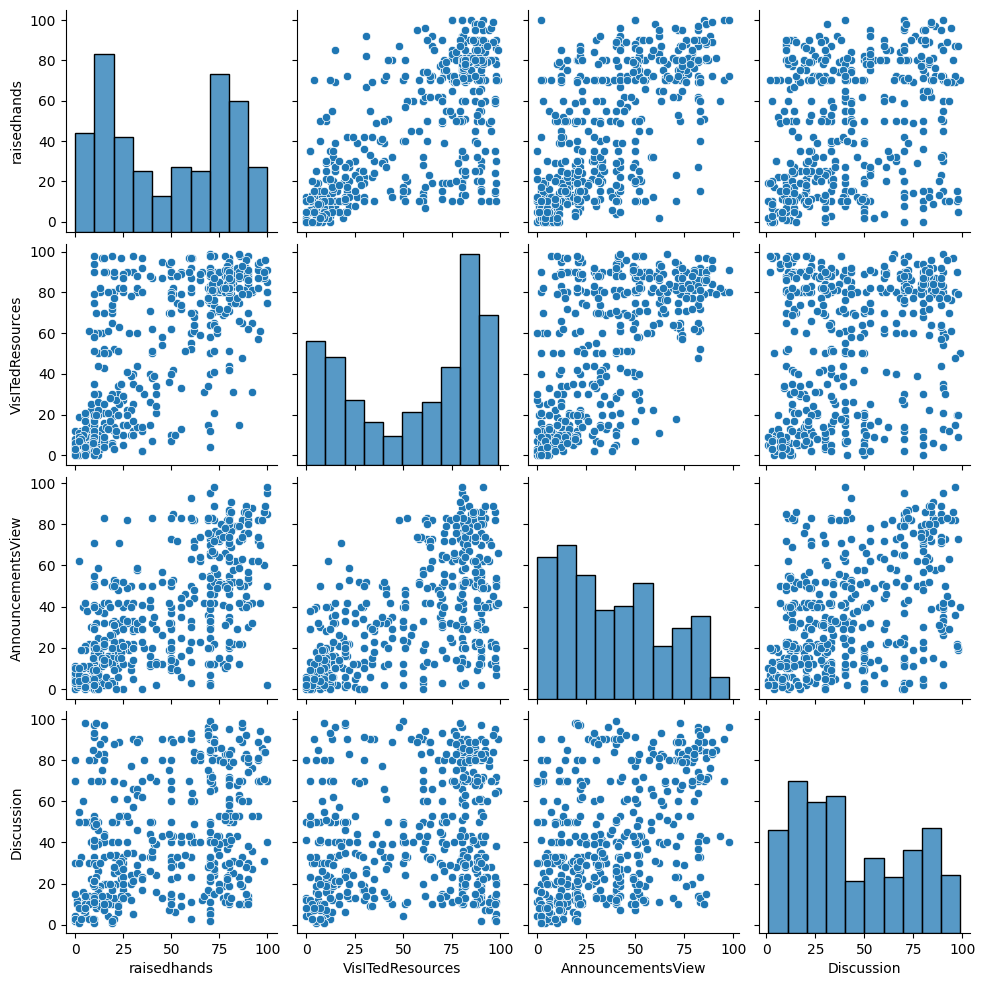

In [111]:
sns.pairplot(df)
plt.show()


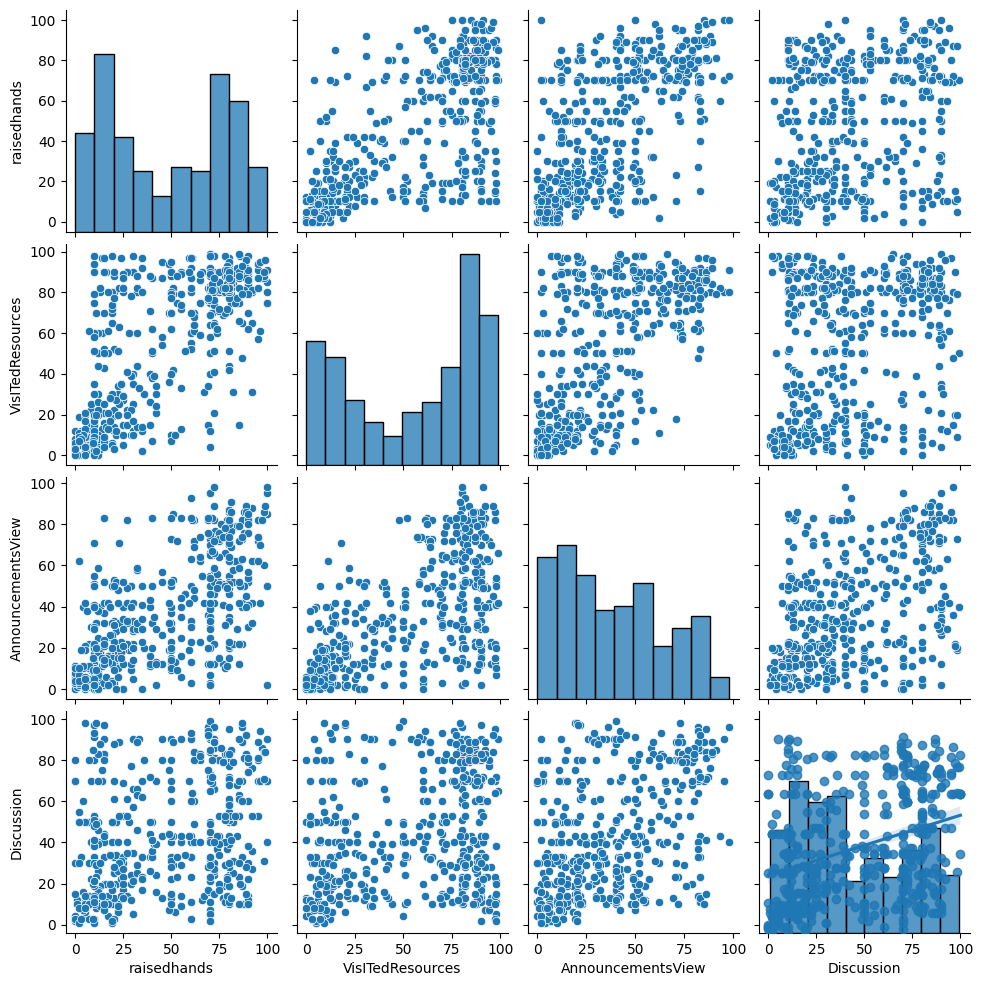

In [113]:
sns.pairplot(df)
sns.regplot(x='raisedhands', y='Discussion', data=df)
plt.show()
